<a href="https://colab.research.google.com/github/antonsysoev/Ass/blob/main/Numerical_Differentiation_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
x <- c(0.0, 0.2, 0.4)
fx <- c(0.00000, 0.74140, 1.3718)

In [8]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library(ggplot2)

In [2]:
finite.differences <- function(x, y) {
  if (length(x) != length(y)) {
    stop('x and y vectors must have equal length')
  }

  n <- length(x)

  # Initialize a vector of length n to enter the derivative approximations
  fdx <- vector(length = n)

  # Iterate through the values using the forward differencing method
  for (i in 2:n) {
    fdx[i-1] <- (y[i-1] - y[i]) / (x[i-1] - x[i])
  }

  # For the last value, since we are unable to perform the forward differencing method
  # as only the first n values are known, we use the backward differencing approach
  # instead. Note this will essentially give the same value as the last iteration
  # in the forward differencing method, but it is used as an approximation as we
  # don't have any more information
  fdx[n] <- (y[n] - y[n - 1]) / (x[n] - x[n - 1])

  return(fdx)
}

In [3]:
finite <- finite.differences(x, fx)
finite
## [1] 3.707 3.152 3.152

[1] 3.707 3.152 3.152

In [4]:
f <- function(x) {
  return(exp(x) - 2 * x^2 + 3 * x - 1)
}

In [5]:
central.difference <- function(f, x) {
  steps <- c(0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)
  n <- length(steps)

  fdx <- vector(length = n)

  for (h in 1:n) {
    fdx[h] <- (f(x + 0.5 * steps[h]) - f(x - 0.5 * steps[h])) / steps[h]
  }

  return(fdx)
}

In [6]:
fdx <- function(x) {
  return(exp(x) - 4 * x + 3)
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


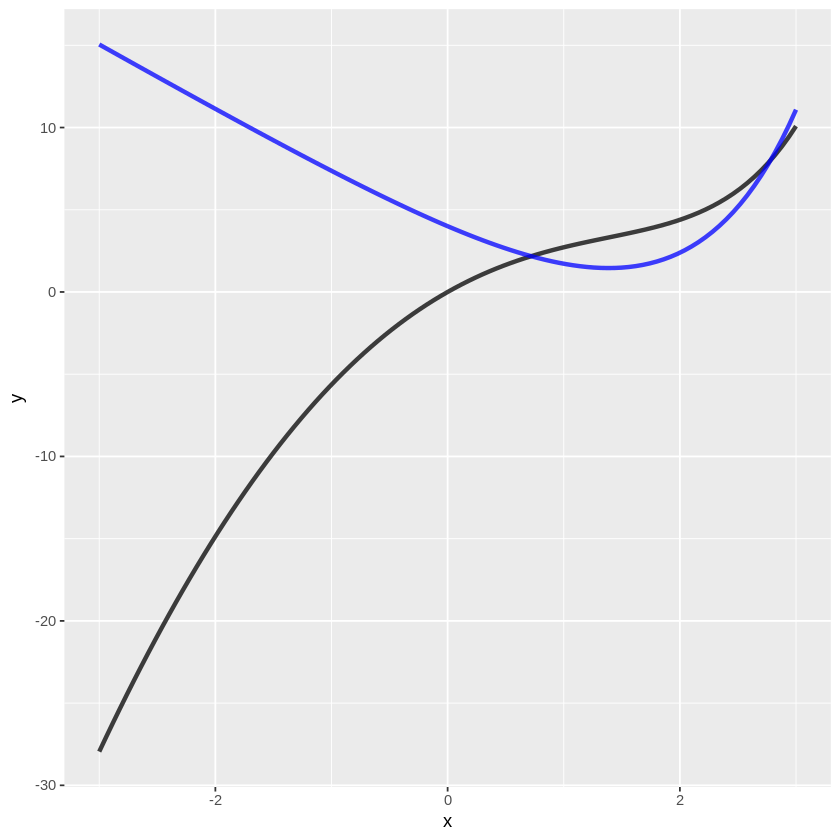

In [10]:
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) +
  stat_function(fun = f, size = 1.25, alpha = 0.75) +
  stat_function(fun = fdx, size = 1.25, color = 'blue', alpha = 0.75) +
  xlim(-3,3)

In [11]:
actual <- vector(length = length(x))
central.approx <- c(4.00000, 3.421403, 2.891825)

for (i in 1:length(x)) {
  actual[i] <- fdx(x[i])
}

approx.df <- data.frame(cbind(actual, central.approx, actual - central.approx, finite, actual - finite))
colnames(approx.df) <- c('Actual Values', 'Central Difference Approx', 'Central Differences Error', 'Finite Differences', 'Finite Differences Error')

approx.df
##   Actual Values Central Difference Approx Central Differences Error
## 1      4.000000                  4.000000              0.000000e+00
## 2      3.421403                  3.421403             -2.418398e-07
## 3      2.891825                  2.891825             -3.023587e-07
##   Finite Differences Finite Differences Error
## 1              3.707                0.2930000
## 2              3.152                0.2694028
## 3              3.152               -0.2601753

Actual Values,Central Difference Approx,Central Differences Error,Finite Differences,Finite Differences Error
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.000000,4.000000,0.000000e+00,3.707,0.2930000
3.421403,3.421403,-2.418398e-07,3.152,0.2694028
2.891825,2.891825,-3.023587e-07,3.152,-0.2601753


In [12]:
function_to_analyze <- function(x1,x2,x3){
  return(x1*x2+exp(x3))
}